In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


In [6]:

haberman = pd.read_csv('haberman.csv')
haberman.columns = ['Age','Year','Node','Survival']

haberman.head()

,Age,Year,Node,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [7]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       305 non-null    int64
 1   Year      305 non-null    int64
 2   Node      305 non-null    int64
 3   Survival  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [8]:
haberman.isnull().sum()

Age         0
Year        0
Node        0
Survival    0
dtype: int64

In [9]:
haberman.corr()

,Age,Year,Node,Survival
Age,1.000000,0.092623,-0.066548,0.064351
Year,0.092623,1.000000,-0.003277,-0.004076
Node,-0.066548,-0.003277,1.000000,0.286191
Survival,0.064351,-0.004076,0.286191,1.000000


In [10]:
haberman['Survival'].value_counts()

Survival
1    224
2     81
Name: count, dtype: int64

In [11]:
X = haberman.drop('Survival',axis=1)
Y = haberman['Survival']

print(f'Shape of X index 0 : {X.shape[0]}')
print(f'Shape of X index 1 : {X.shape[1]}')
print(f'Shape of Y : {Y.shape[0]}')


Shape of X index 0 : 305
Shape of X index 1 : 3
Shape of Y : 305


In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(244, 3) (61, 3) (244,) (61,)


In [13]:

train_data = []
test_data = []

ranged = range(1,15)

for i in ranged:
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(X_train, Y_train)
    X_train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(Y_train, X_train_pred)
    train_data.append(train_accuracy)
    
    X_test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(Y_test, X_test_pred)
    test_data.append(test_accuracy)

    print(f"Train {i}: {train_accuracy}")
    print(f"Test {i}: {test_accuracy}")
    print("-"*20,"!","-"*20)



Train 1: 0.9836065573770492
Test 1: 0.5901639344262295
-------------------- ! --------------------


Train 2: 0.8401639344262295
Test 2: 0.7049180327868853
-------------------- ! --------------------
Train 3: 0.8688524590163934
Test 3: 0.6065573770491803
-------------------- ! --------------------
Train 4: 0.7991803278688525
Test 4: 0.6885245901639344
-------------------- ! --------------------
Train 5: 0.7991803278688525
Test 5: 0.7377049180327869
-------------------- ! --------------------
Train 6: 0.7827868852459017
Test 6: 0.7213114754098361
-------------------- ! --------------------
Train 7: 0.7868852459016393
Test 7: 0.7213114754098361
-------------------- ! --------------------
Train 8: 0.7786885245901639
Test 8: 0.7213114754098361
-------------------- ! --------------------
Train 9: 0.7868852459016393
Test 9: 0.7377049180327869
-------------------- ! --------------------
Train 10: 0.7868852459016393
Test 10: 0.7540983606557377
-------------------- ! --------------------
Train 11: 0.7827868852459017
Test 11: 0.7377049180327869
-------------------- ! --------------------
Train 

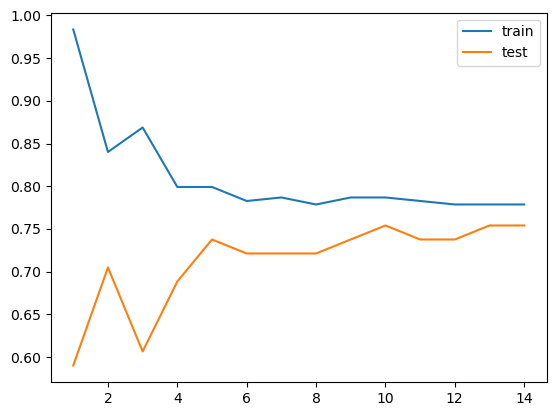

In [14]:
plt.plot(ranged,train_data)
plt.plot(ranged,test_data)
plt.legend(['train','test'])
plt.show()

In [15]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, Y_train)
X_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(Y_train, X_train_pred)
train_data.append(train_accuracy)

X_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(Y_test, X_test_pred)
test_data.append(test_accuracy)
print(f"Train {i}: {train_accuracy}")
print(f"Test {i}: {test_accuracy}")
print("-"*20,"!","-"*20)


Train 14: 0.7868852459016393
Test 14: 0.7540983606557377
-------------------- ! --------------------


In [16]:

print("Classification Report - Training Set:")
print(classification_report(Y_train, X_train_pred,target_names=['Alive','Dead']))

print("Classification Report - Testing Set:")
print(classification_report(Y_test, X_test_pred,target_names=['Alive','Dead']))


Classification Report - Training Set:
              precision    recall  f1-score   support

       Alive       0.79      0.97      0.87       179
        Dead       0.76      0.29      0.42        65

    accuracy                           0.79       244
   macro avg       0.77      0.63      0.65       244
weighted avg       0.78      0.79      0.75       244

Classification Report - Testing Set:
              precision    recall  f1-score   support

       Alive       0.78      0.93      0.85        45
        Dead       0.57      0.25      0.35        16

    accuracy                           0.75        61
   macro avg       0.67      0.59      0.60        61
weighted avg       0.72      0.75      0.72        61



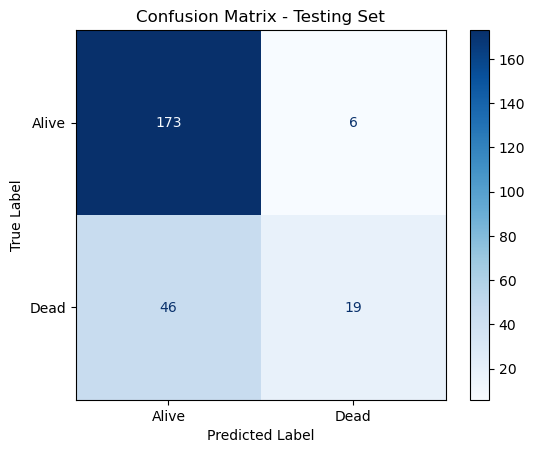

In [17]:

conf_mat = confusion_matrix(Y_train, X_train_pred)
Matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Alive','Dead'])
Matrix.plot(cmap=plt.cm.Blues, values_format='d')  
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


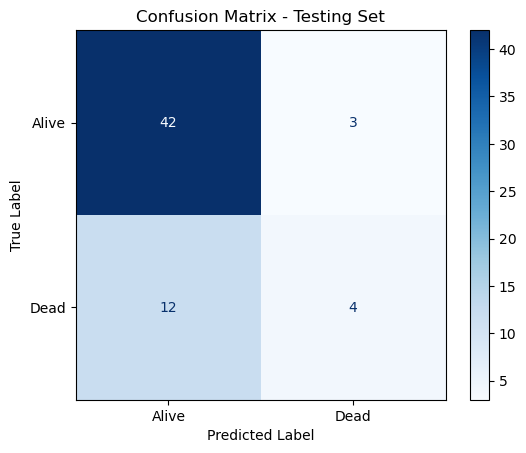

In [18]:

conf_mat = confusion_matrix(Y_test, X_test_pred)
Matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Alive','Dead'])
Matrix.plot(cmap=plt.cm.Blues, values_format='d')  
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [19]:
param_grid = {
    'n_neighbors': range(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
    'p': [1, 2, 3],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
}

In [20]:

grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=2,                       
    scoring='accuracy',
    n_jobs=-1,                  
    verbose=2                   
)


grid_search.fit(X_train, Y_train)


Fitting 2 folds for each of 13920 candidates, totalling 27840 fits


GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'metric': ['euclidean', 'manhattan', 'minkowski',
                                    'chebyshev'],
                         'n_neighbors': range(1, 30), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [21]:

print(f"Best Parameters from GridSearchCV: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")



Best Parameters from GridSearchCV: {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'euclidean', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.7828


In [22]:

best_knn = grid_search.best_estimator_

X_train_pred_best = best_knn.predict(X_train)
train_accuracy_best = accuracy_score(Y_train, X_train_pred_best)
print(f"Train Accuracy with Best Parameters: {train_accuracy_best:}")

X_test_pred_best = best_knn.predict(X_test)
test_accuracy_best = accuracy_score(Y_test, X_test_pred_best)
print(f"Test Accuracy with Best Parameters: {test_accuracy_best:}")


Train Accuracy with Best Parameters: 0.7704918032786885
Test Accuracy with Best Parameters: 0.7377049180327869


In [23]:

print("Classification Report - Training Set (Best Estimator):")
print(classification_report(Y_train, X_train_pred_best, target_names=['Alive','Dead']))

print("Classification Report - Testing Set (Best Estimator):")
print(classification_report(Y_test, X_test_pred_best, target_names=['Alive','Dead']))

Classification Report - Training Set (Best Estimator):
              precision    recall  f1-score   support

       Alive       0.79      0.94      0.86       179
        Dead       0.66      0.29      0.40        65

    accuracy                           0.77       244
   macro avg       0.72      0.62      0.63       244
weighted avg       0.75      0.77      0.74       244

Classification Report - Testing Set (Best Estimator):
              precision    recall  f1-score   support

       Alive       0.77      0.91      0.84        45
        Dead       0.50      0.25      0.33        16

    accuracy                           0.74        61
   macro avg       0.64      0.58      0.59        61
weighted avg       0.70      0.74      0.70        61



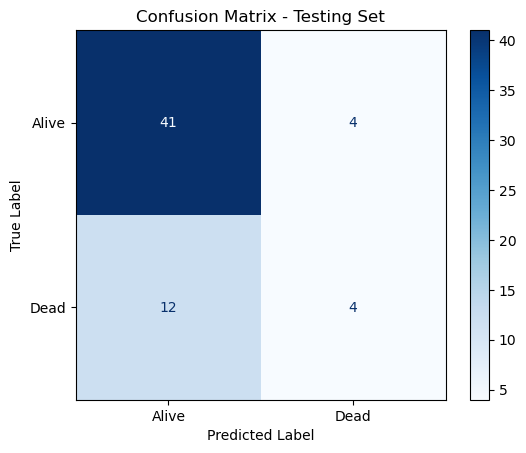

In [24]:

conf_mat = confusion_matrix(Y_test, X_test_pred_best)
Matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Alive','Dead'])
Matrix.plot(cmap=plt.cm.Blues, values_format='d')  
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
